In [1]:
import pandas as pd

raw = pd.read_excel (r'./data/Book4.xlsx')
df = pd.DataFrame(raw, columns= ['TR20_01'])
df = df.iloc[1:]

In [2]:
import modules.rEYEkerAnalysis as rEYEker

(_data, _times, click_setting) = rEYEker.load_data_from_json("data/example.json")

In [3]:
image = rEYEker.load_image("images/TR_Fibonacci.png")

In [13]:
click_data = []
for _idx, item in df.iterrows():
    data_str = item[0]
    data_str = data_str.strip()
    coordinates_str = data_str.split(" ")
    coordinates = []
    for coordinate_str in coordinates_str:
        coordinate = coordinate_str.split("-")
        coordinate = (int(coordinate[0]), int(coordinate[1]))
        coordinates.append(coordinate)
    click_data.append(coordinates)

In [5]:
ims_lines = []
for data in click_data:
    im = rEYEker.draw_vertical_line_diagram(image, data, should_copy=True)
    ims_lines.append(im)

In [6]:
from PIL import Image
import numpy as np


In [7]:
def save_images(ims, prefix, extension):
    for idx, data in enumerate(ims):
        data = data*255
        data = np.uint8(data)
        im = Image.fromarray(data)
        im.save(prefix + str(idx) + extension)

In [8]:
save_images(ims_lines, "./results/lines/TR20_01_", ".png")

In [87]:

ims_heat = []
i = 0
for data in click_data:
    im = rEYEker.draw_shape_heat_map(image, data, click_setting, should_copy=True)
    ims_heat.append(im)

In [94]:
save_images(ims_heat, "./results/heatmaps/TR20_01_", ".png")

In [95]:

ims_combined = []
for idx, data in enumerate(click_data):
    im = rEYEker.draw_vertical_line_diagram(ims_heat[idx], 0, len(data), data, should_copy=True)
    ims_combined.append(im)

In [97]:
save_images(ims_combined, "./results/combined/TR20_01_", ".png")

tuple

In [22]:
click_data = []
tmp = []
for i in range(100):
    tmp.append((100,10))
click_data.append(tmp)
click_data.append([(200,200)])

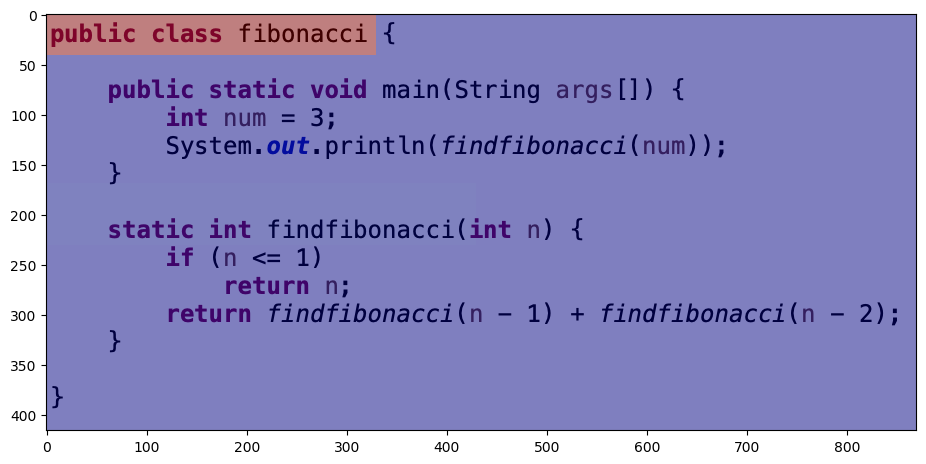

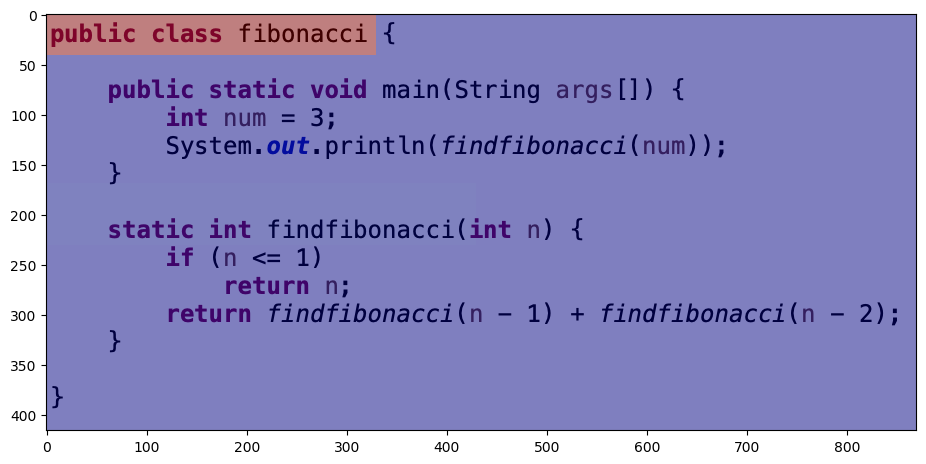

In [23]:
im0 = rEYEker.draw_average_nth_shape_heat_map_abs(image, click_data, click_setting, 0, 1.0, should_copy=True)
im1 = rEYEker.draw_average_nth_shape_heat_map_rel(image, click_data, click_setting, 0, 1.0, should_copy=True)
rEYEker.display(im0, normal_size=True)
rEYEker.display(im1, normal_size=True)